In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



plt.style.use('ggplot')

import nltk

In [4]:
# Read in data
df = pd.read_csv('Reviews.csv')

print(df.shape)

(568454, 10)


In [5]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


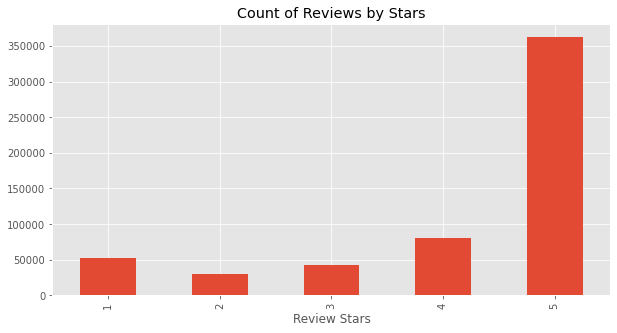

In [6]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [7]:
df_sorted = df.sort_values('HelpfulnessDenominator', ascending=False)
df_sorted.head(30)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
207712,207713,B00012182G,A1JUGIQDY6UYSM,"BabbChuck ""BabbChuck""",844,923,3,1252368000,Whole Rabbit - NOT!,"I ordered one of these Fresh ""Whole"" Rabbits, ..."
190733,190734,B000FI4O90,A1GQGYROVZVW49,P. Schmidt,866,878,5,1164672000,Works as Advertised - Classy Product,see update at end of review<br /><br />*******...
566779,566780,B001PQTYN2,A1QB2Y8GSME58Y,Benjamin Chodroff,808,815,5,1260748800,sauce not for mortals,I purchased a burrito from a small shop a few ...
235722,235723,B001F10XUU,A39V22BIBUMMB3,"Y. Hughes ""Notmyrealname""",580,593,1,1309564800,Lost in Translation: Truth,"This product is called ""Hunmatsu-RyokuCha,"" in..."
222937,222938,B000UUWECC,AU3GYRAKBUAEU,Jon Norris,491,569,3,1212278400,"not bad stuff, but I have serious questions",Coconut water is the liquid inside an unopened...
373575,373576,B009K2BBQG,A1B4MIXYVIKMU2,"D. Truong ""Duke of New Mexico""",559,562,5,1314921600,Works great! But how does it compare to Solofi...,This Ecobrew reusable Keurig K-cup is great fo...
130478,130479,B005F3IAPE,A1B4MIXYVIKMU2,"D. Truong ""Duke of New Mexico""",559,562,5,1314921600,Works great! But how does it compare to Solofi...,This Ecobrew reusable Keurig K-cup is great fo...
96104,96105,B00859FH7O,A1B4MIXYVIKMU2,"D. Truong ""Duke of New Mexico""",559,562,5,1314921600,Works great! But how does it compare to Solofi...,This Ecobrew reusable Keurig K-cup is great fo...
297366,297367,B0069GOKGE,A1B4MIXYVIKMU2,"D. Truong ""Duke of New Mexico""",559,562,5,1314921600,Works great! But how does it compare to Solofi...,This Ecobrew reusable Keurig K-cup is great fo...
467800,467801,B0065G59F4,A1B4MIXYVIKMU2,"D. Truong ""Duke of New Mexico""",559,562,5,1314921600,Works great! But how does it compare to Solofi...,This Ecobrew reusable Keurig K-cup is great fo...


In [8]:
median_score = df['HelpfulnessDenominator'].mean()
median_score

2.2288100708236724

In [9]:
um_zero = (df['HelpfulnessDenominator'] == 0).sum()
um_zero

270052

In [10]:
df['HelpfulnessRatio'] = df.apply(lambda row: row['HelpfulnessNumerator'] / row['HelpfulnessDenominator'] if row['HelpfulnessDenominator'] != 0 else -1, axis=1)

(-1.0, -0.6]         0
(-0.6, -0.2]         0
(-0.2, 0.2]      37896
(0.2, 0.6]       37475
(0.6, 1.0]      223029
(1.0, 1.4]           0
(1.4, 1.8]           1
(1.8, 2.2]           0
(2.2, 2.6]           0
(2.6, 3.0]           1
Name: HelpfulnessRatio, dtype: int64


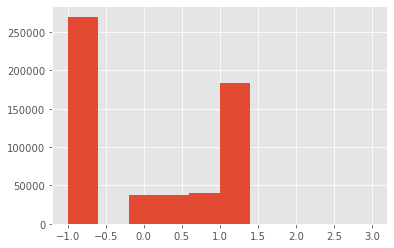

In [11]:
hist, bins, _ = plt.hist(df['HelpfulnessRatio'])

# Get the count of rows in each bin
bin_counts = pd.cut(df['HelpfulnessRatio'], bins=bins).value_counts(sort=False)

# Print the bin counts
print(bin_counts)

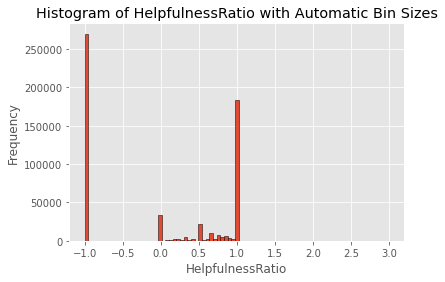

Bin 1: Range (-1.0, -0.9518072289156626), Rows: 270052
Bin 2: Range (-0.9518072289156626, -0.9036144578313253), Rows: 0
Bin 3: Range (-0.9036144578313253, -0.8554216867469879), Rows: 0
Bin 4: Range (-0.8554216867469879, -0.8072289156626506), Rows: 0
Bin 5: Range (-0.8072289156626506, -0.7590361445783133), Rows: 0
Bin 6: Range (-0.7590361445783133, -0.7108433734939759), Rows: 0
Bin 7: Range (-0.7108433734939759, -0.6626506024096386), Rows: 0
Bin 8: Range (-0.6626506024096386, -0.6144578313253012), Rows: 0
Bin 9: Range (-0.6144578313253012, -0.5662650602409638), Rows: 0
Bin 10: Range (-0.5662650602409638, -0.5180722891566265), Rows: 0
Bin 11: Range (-0.5180722891566265, -0.4698795180722891), Rows: 0
Bin 12: Range (-0.4698795180722891, -0.4216867469879517), Rows: 0
Bin 13: Range (-0.4216867469879517, -0.37349397590361444), Rows: 0
Bin 14: Range (-0.37349397590361444, -0.32530120481927705), Rows: 0
Bin 15: Range (-0.32530120481927705, -0.27710843373493976), Rows: 0
Bin 16: Range (-0.277108

In [12]:
plt.hist(df['HelpfulnessRatio'], bins='auto', edgecolor='black')
plt.xlabel('HelpfulnessRatio')
plt.ylabel('Frequency')
plt.title('Histogram of HelpfulnessRatio with Automatic Bin Sizes')
plt.show()

# Print the amount of rows in each bin
counts, bin_edges = np.histogram(df['HelpfulnessRatio'], bins='auto')
for i in range(len(counts)):
    print(f"Bin {i+1}: Range ({bin_edges[i]}, {bin_edges[i+1]}), Rows: {counts[i]}")

In [13]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,-1.0
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,-1.0
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,1.0


In [14]:
from math import sqrt

def wilson_lower_bound(helpful_votes, total_votes, confidence=0.95):
    """
    Calculate the lower bound of Wilson Score Interval.
    
    helpful_votes: int, number of helpful votes (helpfulnessNominator)
    total_votes: int, total number of votes (helpfulnessDenominator)
    confidence: float, the desired confidence level (default: 0.95)
    
    Returns the lower bound of Wilson Score Interval as a float.
    """
    if total_votes == 0:
        return 0
    z = 1.96  # z-score for 95% confidence interval
    phat = float(helpful_votes) / total_votes
    inner_sqrt = (phat * (1 - phat) + z**2 / (4 * total_votes)) / total_votes
    if inner_sqrt < 0:
        inner_sqrt = 0  # Prevent math domain error
    denominator = 1 + z**2/total_votes
    numerator = phat + z**2 / (2 * total_votes) - z * sqrt(inner_sqrt)
    return numerator / denominator

In [15]:
df['wilson_score'] = df.apply(lambda row: wilson_lower_bound(row['HelpfulnessNumerator'], row['HelpfulnessDenominator']), axis=1)

# Set a threshold for wilson_score to filter out low helpfulness reviews
threshold = 0.15
filtered_df = df[df['wilson_score'] >= threshold]

# You can also sort the DataFrame by the Wilson Score
sorted_df = df.sort_values(by='wilson_score', ascending=False)

In [16]:
filtered_df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,HelpfulnessRatio,wilson_score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,0.206543
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,0.206543
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,0.438494
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,0.206543
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,0.206543
...,...,...,...,...,...,...,...,...,...,...,...,...
568440,568441,B005ZC0RRO,A2TO5R8QLIITEF,SAK,1,1,5,1323734400,"Delicious, all natural and allergy free treats!",Indie Candy's gummies are absolutely delicious...,1.0,0.206543
568444,568445,B001EO7N10,A2SD7TY3IOX69B,"BayBay ""BayBay Knows Best""",3,3,5,1245369600,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",1.0,0.438494
568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",1.0,0.342372
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1.0,0.342372
